In [7]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [8]:
import json

# Load configuration
with open("../../config/config_notebooks_HER2.json", "r") as config_file:
    config = json.load(config_file)


In [9]:
## Try to plot the bootstrapped ARI patient values
aris = {}

for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                                              config['retrained_model_list2_type']],
                                             [config['retrained_model_list1'],
                                              config['retrained_model_list2']],
                                             [config['retrained_benchmark_folder1'],
                                              config['retrained_benchmark_folder2']]):
    path_to_unsupervised_clustering = os.path.join(benchmark_path, "unsupervised_clustering_ARI", "kmeans")
    
    with open(os.path.join(path_to_unsupervised_clustering, "ARI_patient.json"), "rb") as f:
        ari_patient = json.load(f)
        
    for name in names:
        aris[name] = ari_patient[name]
        


In [10]:
aris

{'uni': 0.280817806724743,
 'uni_explora_kde_4096_prototypes': 0.24270083579006904,
 'uni_explora_kde_16384_prototypes': 0.3018016675595541,
 'uni_explora_kde_65536_prototypes': 0.2403155312643396,
 'uni_explora_koleo_4096_prototypes': 0.24069859094634052,
 'uni_explora_koleo_16384_prototypes': 0.26197316265138726,
 'uni_explora_koleo_65536_prototypes': 0.2718380521387614,
 'uni_full_kde_4096_prototypes': 0.17654408065665927,
 'uni_full_kde_16384_prototypes': 0.17828293336271,
 'uni_full_kde_65536_prototypes': 0.21106037262622132,
 'uni_full_koleo_4096_prototypes': 0.15860593382594623,
 'uni_full_koleo_16384_prototypes': 0.17274942113940106,
 'uni_full_koleo_65536_prototypes': 0.1783222638094251}

In [11]:
df_boot = pd.DataFrame.from_dict(aris, orient='index')

df_boot["batch_effect"] = 1 - df_boot[0]

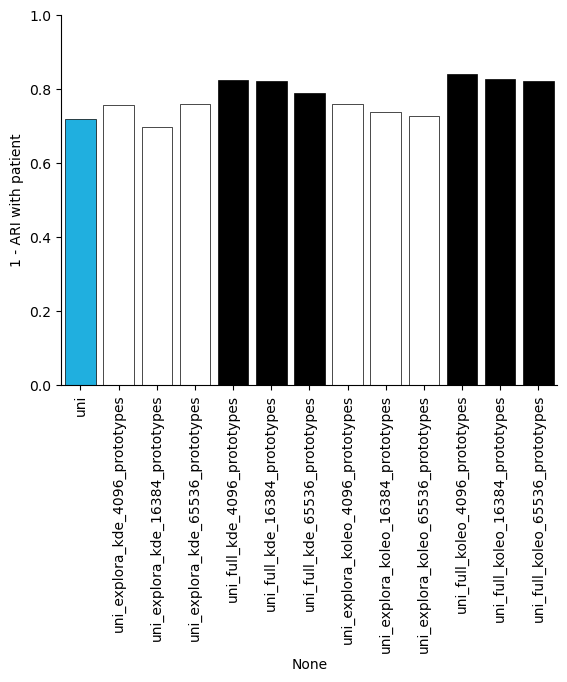

In [12]:
if len(df_boot) > 0:
  df_boot = df_boot.loc[["uni",
                "uni_explora_kde_4096_prototypes",
                "uni_explora_kde_16384_prototypes",
                  "uni_explora_kde_65536_prototypes",
                  "uni_full_kde_4096_prototypes",
                  "uni_full_kde_16384_prototypes",
                  "uni_full_kde_65536_prototypes",
                  "uni_explora_koleo_4096_prototypes",
                  "uni_explora_koleo_16384_prototypes",
                  "uni_explora_koleo_65536_prototypes",
                  "uni_full_koleo_4096_prototypes",
                  "uni_full_koleo_16384_prototypes",
                  "uni_full_koleo_65536_prototypes"]]
  
  
  sns.barplot(data=df_boot, 
              y="batch_effect",
              x=df_boot.index,
            palette=["deepskyblue", 
                     "white", "white", "white", 
                     "black","black", "black", 
                     "white", "white", "white", 
                     "black", "black","black"], 
            linewidth=0.5,
            edgecolor="black",
            )
  plt.ylabel("1 - ARI with patient")
  plt.xticks(rotation=90)
  sns.despine()
  plt.ylim(0,1)